In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('C:/Users/prash/Desktop/python materials/python_data_projects/project_IPL_analysis/delivery.csv')
df_matches=pd.read_csv('C:/Users/prash/Desktop/python materials/python_data_projects/project_IPL_analysis/matches.csv')

Team wise IPL trophies

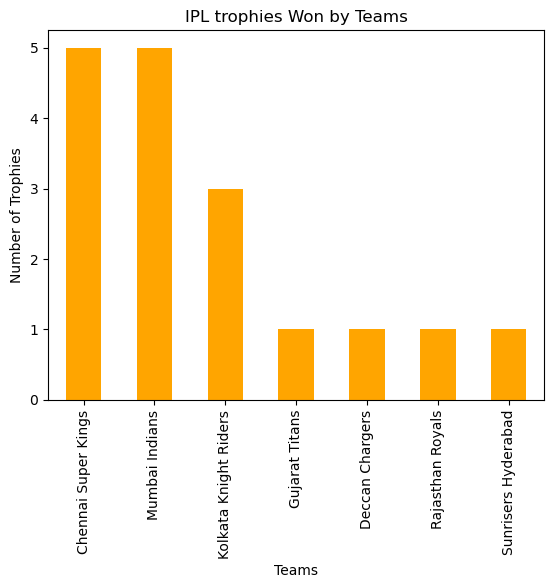

In [3]:
df_matches[df_matches['match_type']=='Final'].groupby('winner').size().sort_values(ascending=False).plot(kind='bar', color='orange')
df_winners = df_matches[df_matches['match_type']=='Final'].groupby('winner').size().sort_values(ascending=False)
plt.title('IPL trophies Won by Teams')
plt.xlabel('Teams')
plt.ylabel('Number of Trophies')
#plt.xticks(rotation=45)
plt.show()

Finals won chasing or batting first?

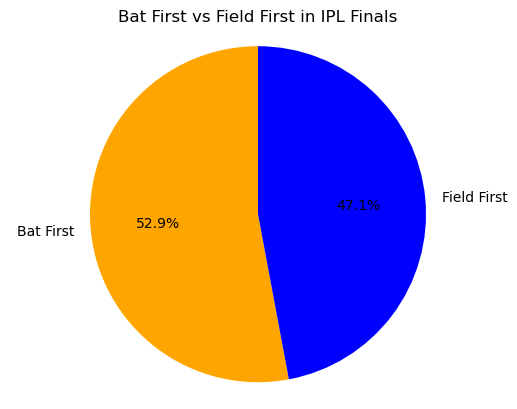

In [4]:
df_finals=df_matches[df_matches['match_type']=='Final']
batfirst=0
fieldfirst=0
for i in range(len(df_finals)):
    if df_finals['toss_winner'].iloc[i]==df_finals['winner'].iloc[i] and df_finals['toss_decision'].iloc[i]=='bat':
        batfirst+=1
    elif df_finals['toss_winner'].iloc[i]==df_finals['winner'].iloc[i] and df_finals['toss_decision'].iloc[i]=='field':
        fieldfirst+=1
    elif df_finals['toss_winner'].iloc[i]!=df_finals['winner'].iloc[i] and df_finals['toss_decision'].iloc[i]=='bat':
        fieldfirst+=1
    elif df_finals['toss_winner'].iloc[i]!=df_finals['winner'].iloc[i] and df_finals['toss_decision'].iloc[i]=='field':
        batfirst+=1

plt.pie([batfirst, fieldfirst], labels=['Bat First', 'Field First'], autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])
plt.title('Bat First vs Field First in IPL Finals')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Team reaching qualifier round most

In [5]:
df_qualifiers=df_matches[df_matches['match_type'].str.contains('Qualifier',na=False)]
set1=df_qualifiers['team1'].value_counts().reset_index()
set1


,team1,count
0,Chennai Super Kings,6
1,Mumbai Indians,4
2,Delhi Capitals,4
3,Sunrisers Hyderabad,4
4,Royal Challengers Bangalore,3
5,Delhi Daredevils,2
6,Gujarat Lions,2
7,Kings XI Punjab,1
8,Rajasthan Royals,1
9,Gujarat Titans,1


In [6]:
set2=df_qualifiers['team2'].value_counts().reset_index()
set2.columns=['team1','countagain']
merged=set1.merge(set2, on='team1', how='outer')
merged.fillna(0,inplace=True)
merged['sum']=merged['countagain']+merged['count']
merged=merged.sort_values(by='sum', ascending=False)

In [7]:
set2

,team1,countagain
0,Kolkata Knight Riders,6
1,Chennai Super Kings,5
2,Mumbai Indians,5
3,Rajasthan Royals,3
4,Royal Challengers Bangalore,2
5,Sunrisers Hyderabad,2
6,Gujarat Titans,2
7,Kings XI Punjab,1
8,Rising Pune Supergiant,1
9,Delhi Capitals,1


In [8]:
merged.reset_index(drop='index')

,team1,count,countagain,sum
0,Chennai Super Kings,6.0,5.0,11.0
1,Mumbai Indians,4.0,5.0,9.0
2,Kolkata Knight Riders,0.0,6.0,6.0
3,Sunrisers Hyderabad,4.0,2.0,6.0
4,Delhi Capitals,4.0,1.0,5.0
5,Royal Challengers Bangalore,3.0,2.0,5.0
6,Rajasthan Royals,1.0,3.0,4.0
7,Gujarat Titans,1.0,2.0,3.0
8,Gujarat Lions,2.0,0.0,2.0
9,Delhi Daredevils,2.0,0.0,2.0


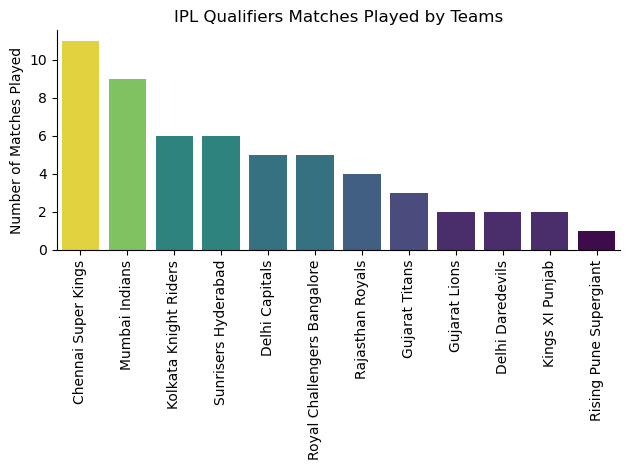

In [11]:
sns.barplot(x='team1', y='sum', data=merged, palette='viridis',hue='sum')
plt.title('IPL Qualifiers Matches Played by Teams')
plt.xlabel('')
plt.ylabel('Number of Matches Played')
plt.xticks(rotation=90)
plt.legend().remove()
sns.despine()
plt.tight_layout()
plt.show()


The Chokers!

In [ ]:
df_winners=df_winners.reset_index()
df_winners

,winner,0
0,Chennai Super Kings,5
1,Mumbai Indians,5
2,Kolkata Knight Riders,3
3,Gujarat Titans,1
4,Deccan Chargers,1
5,Rajasthan Royals,1
6,Sunrisers Hyderabad,1


In [ ]:
df_winners.columns=['Team','Trophies']
df_winners

,Team,Trophies
0,Chennai Super Kings,5
1,Mumbai Indians,5
2,Kolkata Knight Riders,3
3,Gujarat Titans,1
4,Deccan Chargers,1
5,Rajasthan Royals,1
6,Sunrisers Hyderabad,1


In [ ]:
chokers=merged.merge(df_winners, on='Team', how='outer')
chokers.fillna(0,inplace=True)

In [ ]:
chokers[chokers['Trophies']==0].sort_values(by='Qualifiers Played', ascending=False)

,Team,Qualifiers Played,Trophies
2,Delhi Capitals,5.0,0.0
11,Royal Challengers Bangalore,5.0,0.0
3,Delhi Daredevils,2.0,0.0
4,Gujarat Lions,2.0,0.0
6,Kings XI Punjab,2.0,0.0
10,Rising Pune Supergiant,1.0,0.0


DC and RCB are chokers of IPL!

Venue wise bat first runs

In [12]:
has_duplicates = df_matches['id'].duplicated().any()
print(f"Does the column '{df_matches['id']}' have duplicates? {has_duplicates}")

Does the column '0        335982
1        335983
2        335984
3        335985
4        335986
         ...   
1090    1426307
1091    1426309
1092    1426310
1093    1426311
1094    1426312
Name: id, Length: 1095, dtype: int64' have duplicates? False


In [17]:
matchwise=df_matches.groupby(['id','venue']).agg({'target_runs':'sum'})
matchwise.reset_index(inplace=True)
matchwise

,id,venue,target_runs
0,335982,M Chinnaswamy Stadium,223.0
1,335983,"Punjab Cricket Association Stadium, Mohali",241.0
2,335984,Feroz Shah Kotla,130.0
3,335985,Wankhede Stadium,166.0
4,335986,Eden Gardens,111.0
...,...,...,...
1090,1426307,"Rajiv Gandhi International Stadium, Uppal, Hyd...",215.0
1091,1426309,"Narendra Modi Stadium, Ahmedabad",160.0
1092,1426310,"Narendra Modi Stadium, Ahmedabad",173.0
1093,1426311,"MA Chidambaram Stadium, Chepauk, Chennai",176.0


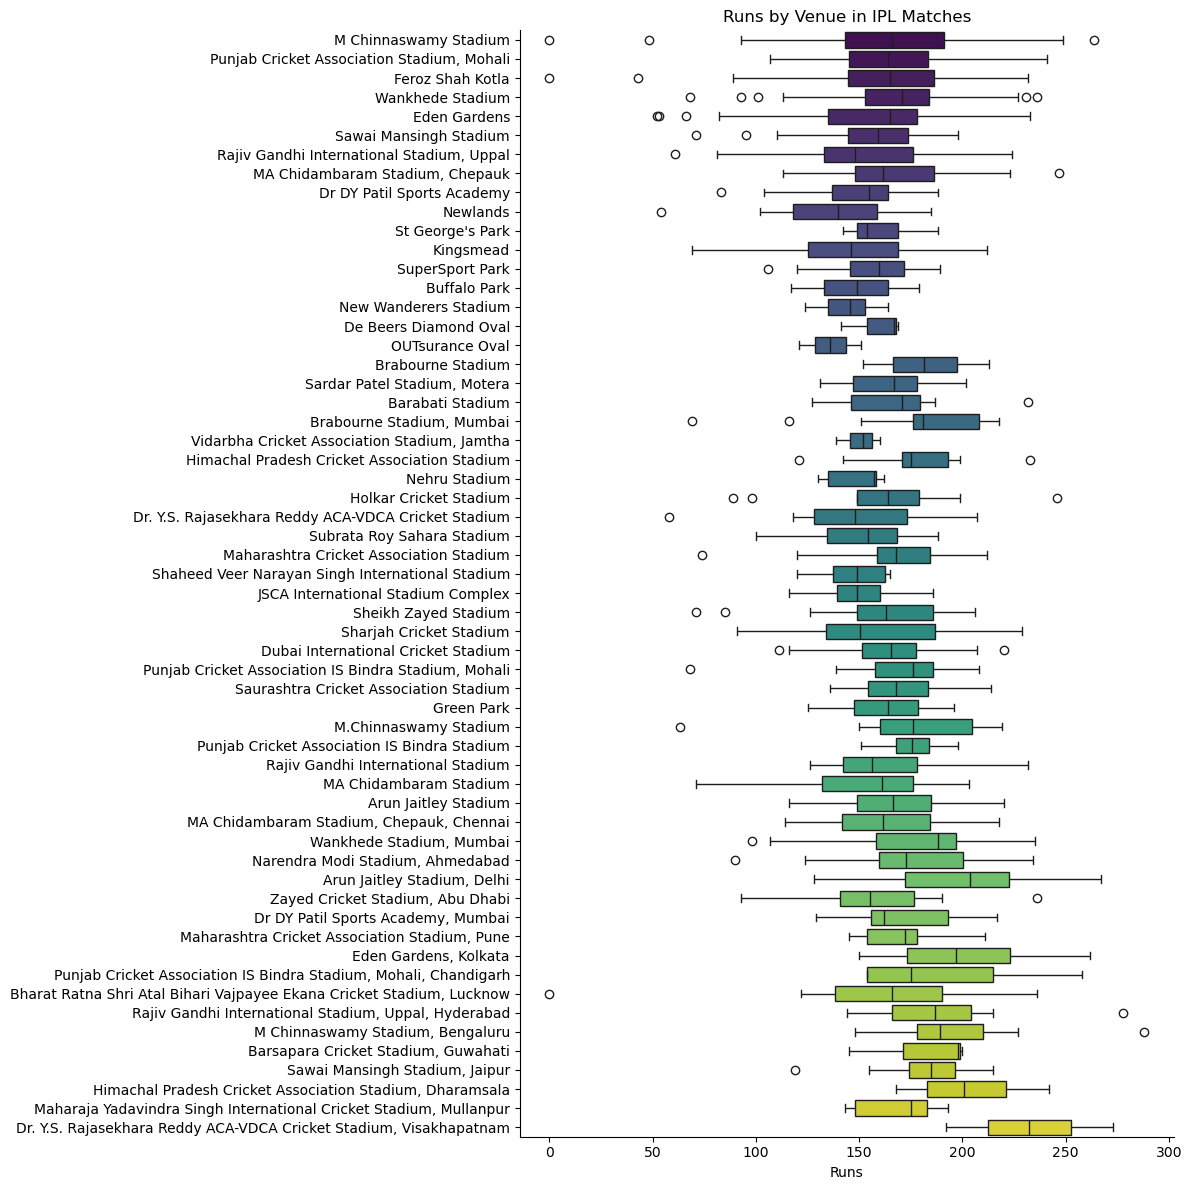

In [22]:
plt.figure(figsize=(12, 12))
sns.boxplot(x='target_runs', y='venue', data=matchwise, palette='viridis',hue='venue')
plt.title('Runs by Venue in IPL Matches')
plt.xlabel('Runs')
plt.ylabel('')
#plt.xticks(rotation=90)
#plt.legend().remove()

sns.despine()
plt.tight_layout()
plt.show()


In [15]:
df_matches

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma
